Для проведения разведочного анализа данных потребуются опеределенные методы обработкииз нескольких библиотек. Загрузим их.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import read_excel
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Загрузим объединенный датасет:
ds = pd.read_excel(r"D:\мгту им Баумана\ВКР_Новикова_Е.Г\DS\ds.xlsx")
#Посмотрим на первые пять строк таблицы:
ds.head()

,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Угол нашивки,Шаг нашивки,Плотность нашивки
0,0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0,4.0,57.0
1,1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
2,2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,70.0
3,3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
4,4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0


In [4]:
#Удалим первый неинформативный столбец:
ds.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
# Повторно загрузим 5 верхних строк датасета:
ds.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Угол нашивки,Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0,4.0,57.0
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,70.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0


In [6]:
# Определим размер таблицы:
ds.shape

(1023, 13)

In [7]:
# Посмотрим значения данных описательной статистики:
ds.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Угол нашивки,Шаг нашивки,Плотность нашивки
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,2.930366,1975.734888,739.923233,110.570769,22.244390,285.882151,482.731833,73.328571,2466.922843,218.423144,0.491691,6.899222,57.153929
std,0.913222,73.729231,330.231581,28.295911,2.406301,40.943260,281.314690,3.118983,485.628006,59.735931,0.500175,2.563467,12.350969
min,0.389403,1731.764635,2.436909,17.740275,14.254985,100.000000,0.603740,64.054061,1036.856605,33.803026,0.000000,0.000000,0.000000
25%,2.317887,1924.155467,500.047452,92.443497,20.608034,259.066528,266.816645,71.245018,2135.850448,179.627520,0.000000,5.080033,49.799212
50%,2.906878,1977.621657,739.664328,110.564840,22.230744,285.896812,451.864365,73.268805,2459.524526,219.198882,0.000000,6.916144,57.341920
75%,3.552660,2021.374375,961.812526,129.730366,23.961934,313.002106,693.225017,75.356612,2767.193119,257.481724,1.000000,8.586293,64.944961
max,5.591742,2207.773481,1911.536477,198.953207,33.000000,413.273418,1399.542362,82.682051,3848.436732,414.590628,1.000000,14.440522,103.988901


Для каждой колонки получим среднее, медианное значение в соответствии с поставленной задачей.

In [8]:
# среднее значение:
ds.mean()

Соотношение матрица-наполнитель            2.930366
Плотность, кг/м3                        1975.734888
модуль упругости, ГПа                    739.923233
Количество отвердителя, м.%              110.570769
Содержание эпоксидных групп,%_2           22.244390
Температура вспышки, С_2                 285.882151
Поверхностная плотность, г/м2            482.731833
Модуль упругости при растяжении, ГПа      73.328571
Прочность при растяжении, МПа           2466.922843
Потребление смолы, г/м2                  218.423144
Угол нашивки                               0.491691
Шаг нашивки                                6.899222
Плотность нашивки                         57.153929
dtype: float64

In [9]:
# медианное значение:
ds.median()

Соотношение матрица-наполнитель            2.906878
Плотность, кг/м3                        1977.621657
модуль упругости, ГПа                    739.664328
Количество отвердителя, м.%              110.564840
Содержание эпоксидных групп,%_2           22.230744
Температура вспышки, С_2                 285.896812
Поверхностная плотность, г/м2            451.864365
Модуль упругости при растяжении, ГПа      73.268805
Прочность при растяжении, МПа           2459.524526
Потребление смолы, г/м2                  219.198882
Угол нашивки                               0.000000
Шаг нашивки                                6.916144
Плотность нашивки                         57.341920
dtype: float64

In [10]:
# Видим, что средние и медианные значения очень близки, для наглядности покажем это в таблице из двух строк: 
mean_and_50 = ds.describe()
mean_and_50.loc[['mean', '50%']]

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Угол нашивки,Шаг нашивки,Плотность нашивки
mean,2.930366,1975.734888,739.923233,110.570769,22.244390,285.882151,482.731833,73.328571,2466.922843,218.423144,0.491691,6.899222,57.153929
50%,2.906878,1977.621657,739.664328,110.564840,22.230744,285.896812,451.864365,73.268805,2459.524526,219.198882,0.000000,6.916144,57.341920


In [11]:
# Проверим пропущенные значения в полученном датасете - их нет:
ds.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки                            0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

<AxesSubplot:>

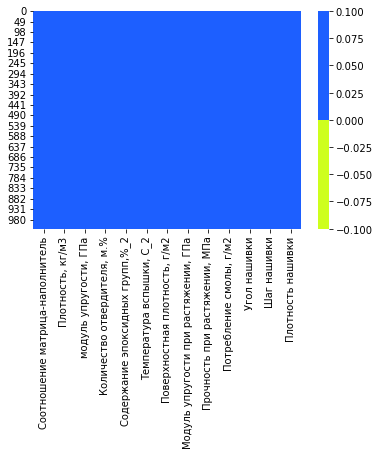

In [12]:
# Проверим наличие пропусков на тепловой карте (салатовый означает пропщенные значения, синий - заполненные):
cols = ds.columns
colours = ['#ceff1d', '#1d5fff']
sns.heatmap(ds[cols].isnull(), cmap = sns.color_palette(colours))

In [13]:
# Проверим пропуски в каждом из 13 столбцов в процентном отношении - в третий раз гипотеза об их отсутствии подтвердилась:
for col in ds.columns:
    pct_missing = np.mean(ds[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Соотношение матрица-наполнитель - 0%
Плотность, кг/м3 - 0%
модуль упругости, ГПа - 0%
Количество отвердителя, м.% - 0%
Содержание эпоксидных групп,%_2 - 0%
Температура вспышки, С_2 - 0%
Поверхностная плотность, г/м2 - 0%
Модуль упругости при растяжении, ГПа - 0%
Прочность при растяжении, МПа - 0%
Потребление смолы, г/м2 - 0%
Угол нашивки - 0%
Шаг нашивки - 0%
Плотность нашивки - 0%


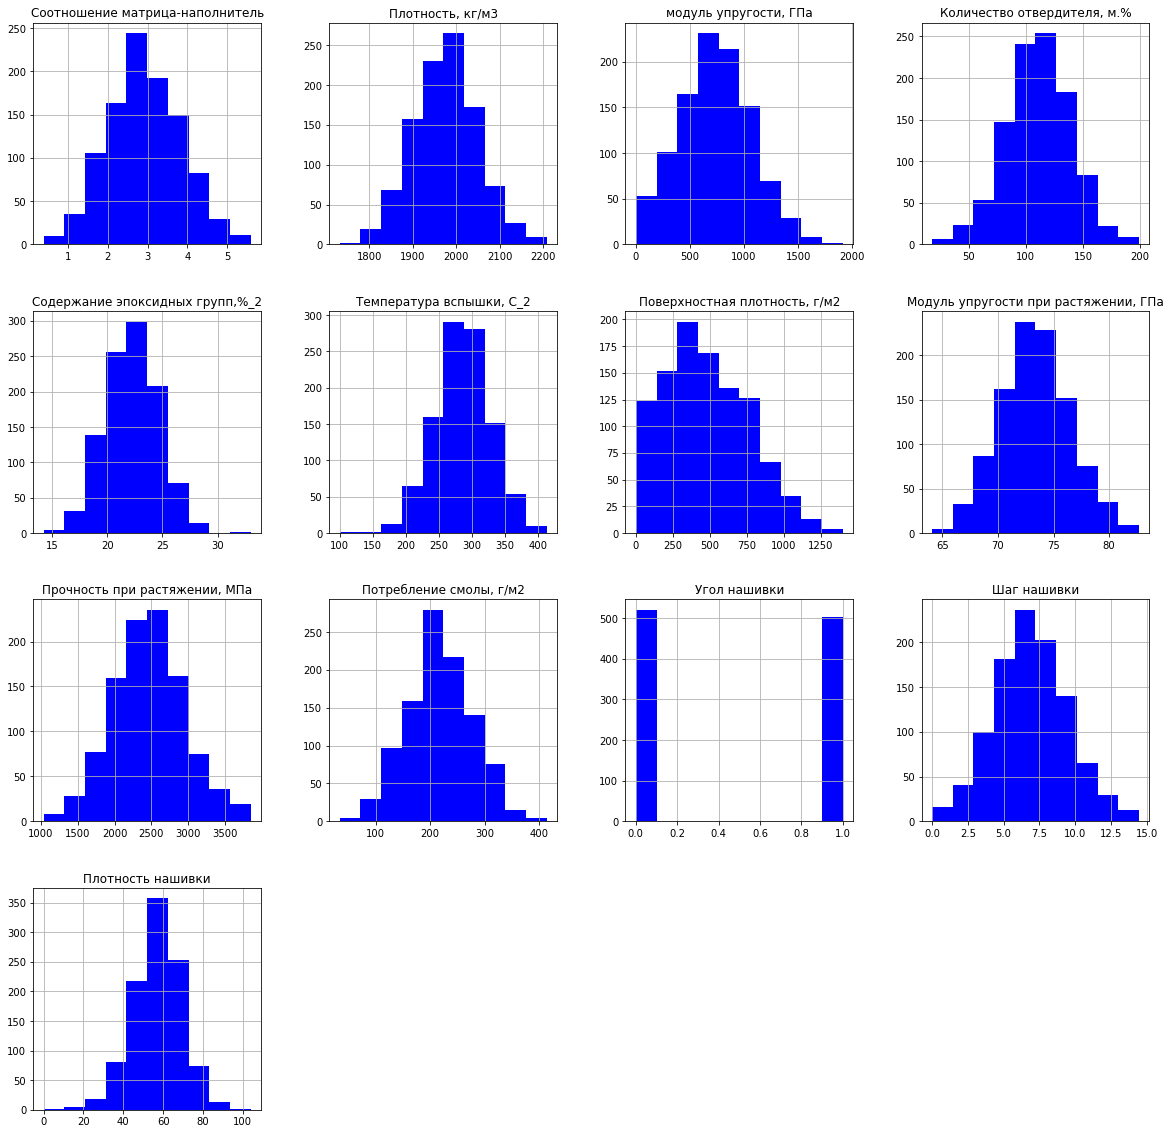

In [14]:
# Построим гистограммы распределения для каждой переменной и увидем, что они близки к нормальному, за исключением преобразованного нами стобца с углом нашивки:
ds.hist(figsize = (20,20), color = "b")
plt.show()

Работа с выбросами

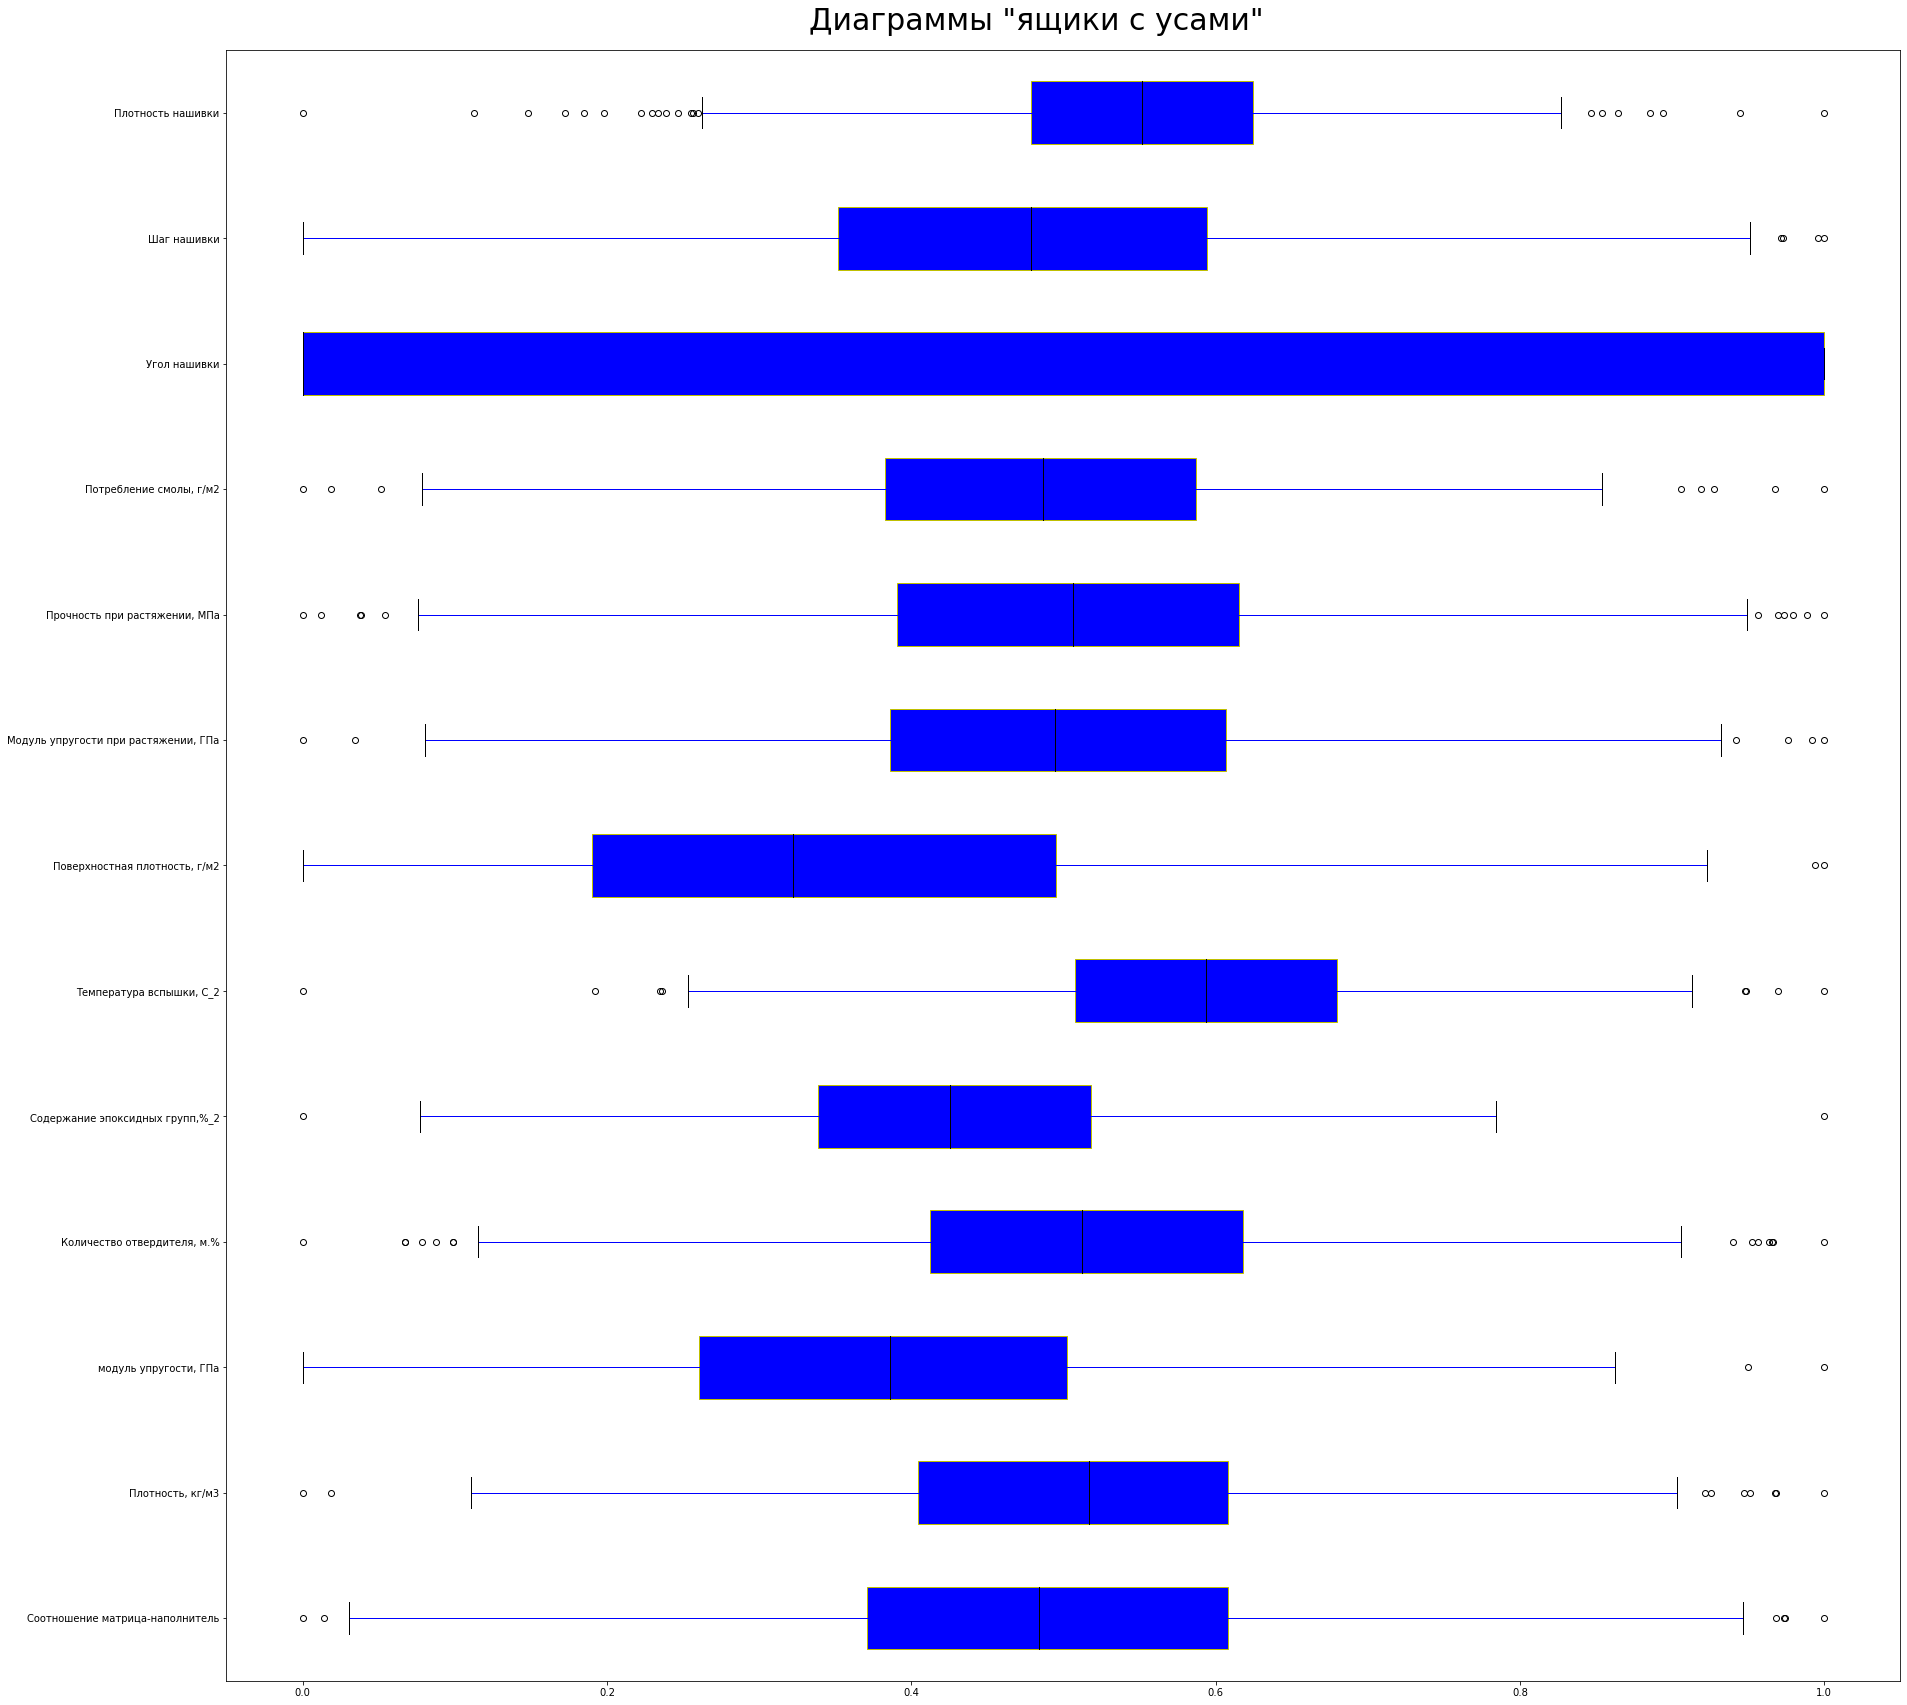

In [15]:
#Масштабируем данные, чтобы они находились в одном диапазоне:
scaler = MinMaxScaler()
scaler.fit(ds)
plt.figure(figsize = (30, 30))
# Для каждого признака построим диаграмму "ящики с усами", где наглядно тотбражаются выбросы - значения, отклоняющиеся от медианных, а в нашем случае и средних.

plt.suptitle('Диаграммы "ящики с усами"', y = 0.9,
             fontsize = 30)
plt.boxplot(pd.DataFrame(scaler.transform(ds)), labels = ds.columns,patch_artist = True, meanline = True, vert = False, boxprops = dict(facecolor = 'b', color = 'y'),medianprops = dict(color = 'black'), whiskerprops = dict(color="b"), capprops = dict(color = "black"), flierprops = dict(color = "b", markeredgecolor = "black"))
plt.show()


In [16]:
# Для дальнейшего создания моделей введем переменную column_names с названиями столбцов:
ds.columns
column_names = ["Соотношение матрица-наполнитель","Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%",
"Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2",
"Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",
"Угол нашивки, град","Шаг нашивки","Плотность нашивки"]
column_names = ds.columns

Соотношение матрица-наполнитель


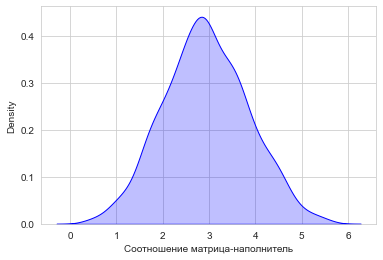

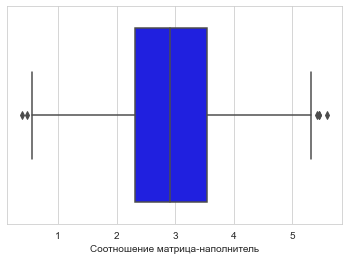

Минимальное значение:  0.389402605178414
Максимальное значение:  5.59174159869754
Среднее значение:  2.9303657734325506
Медианное значение:  2.90687765033521



Плотность, кг/м3


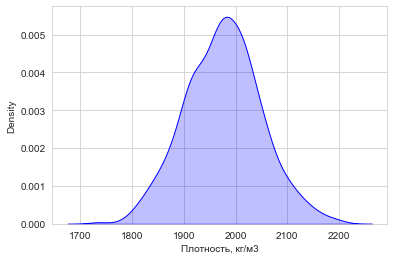

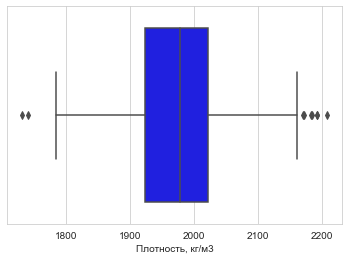

Минимальное значение:  1731.764635096
Максимальное значение:  2207.77348061119
Среднее значение:  1975.7348881101548
Медианное значение:  1977.62165679058



модуль упругости, ГПа


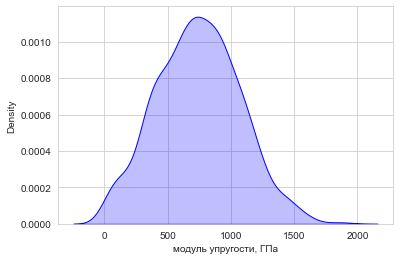

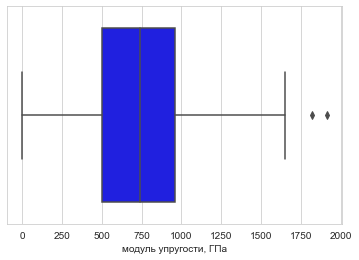

Минимальное значение:  2.4369087535075
Максимальное значение:  1911.53647700054
Среднее значение:  739.9232327560719
Медианное значение:  739.664327697792



Количество отвердителя, м.%


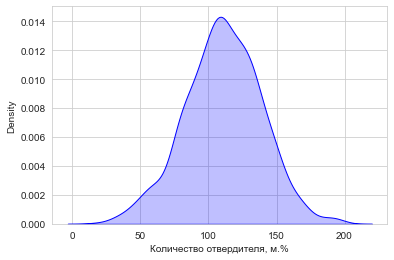

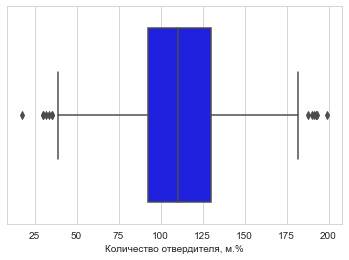

Минимальное значение:  17.7402745562519
Максимальное значение:  198.953207190451
Среднее значение:  110.57076864736258
Медианное значение:  110.564839894065



Содержание эпоксидных групп,%_2


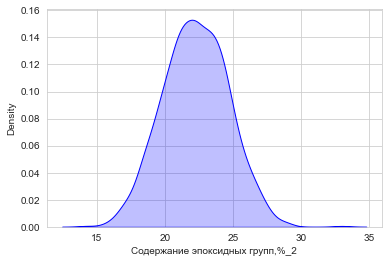

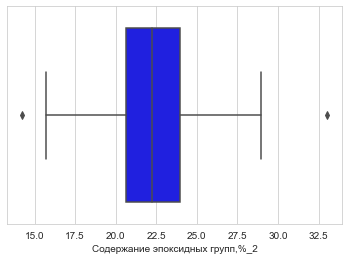

Минимальное значение:  14.2549854977161
Максимальное значение:  33.0
Среднее значение:  22.24438954776772
Медианное значение:  22.2307437560244



Температура вспышки, С_2


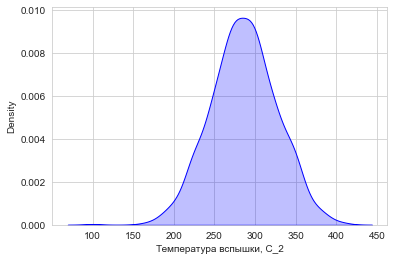

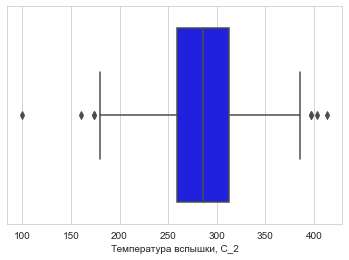

Минимальное значение:  100.0
Максимальное значение:  413.273418243566
Среднее значение:  285.88215135162227
Медианное значение:  285.896812331237



Поверхностная плотность, г/м2


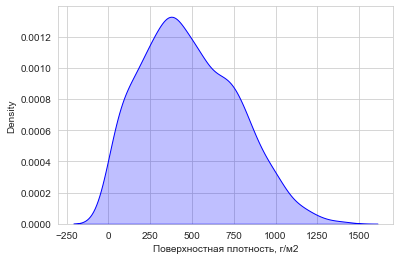

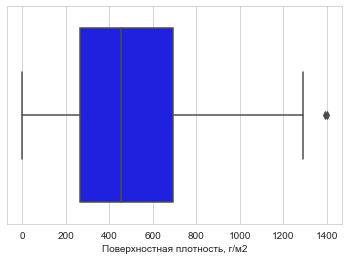

Минимальное значение:  0.603739925153945
Максимальное значение:  1399.54236233989
Среднее значение:  482.7318330384181
Медианное значение:  451.86436518306



Модуль упругости при растяжении, ГПа


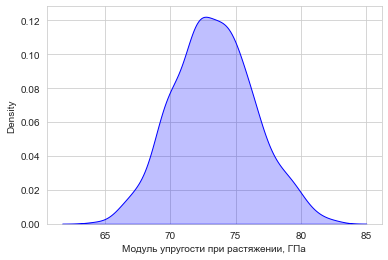

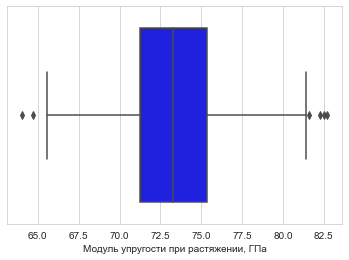

Минимальное значение:  64.0540605597917
Максимальное значение:  82.682051035271
Среднее значение:  73.32857125009073
Медианное значение:  73.2688045943481



Прочность при растяжении, МПа


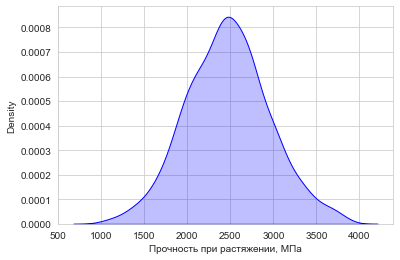

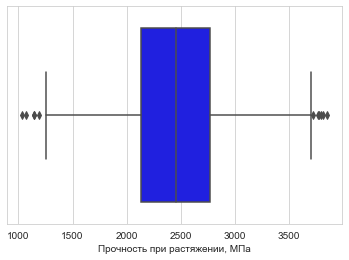

Минимальное значение:  1036.85660535
Максимальное значение:  3848.43673187618
Среднее значение:  2466.9228426979025
Медианное значение:  2459.52452600309



Потребление смолы, г/м2


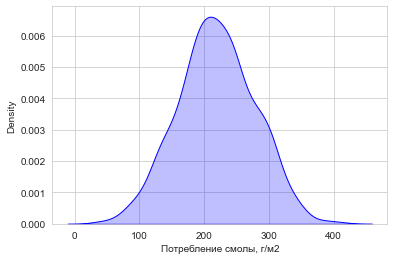

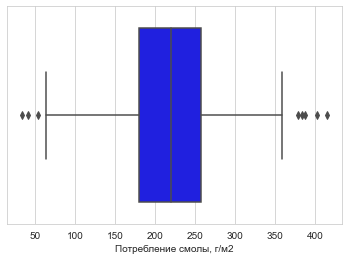

Минимальное значение:  33.8030255329625
Максимальное значение:  414.590628361534
Среднее значение:  218.42314367654265
Медианное значение:  219.198882195134



Угол нашивки


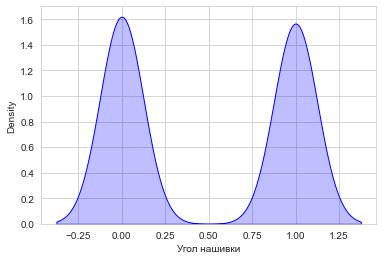

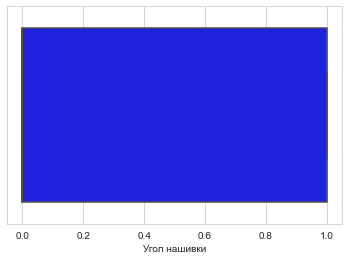

Минимальное значение:  0
Максимальное значение:  1
Среднее значение:  0.4916911045943304
Медианное значение:  0.0



Шаг нашивки


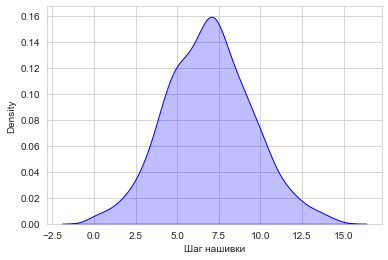

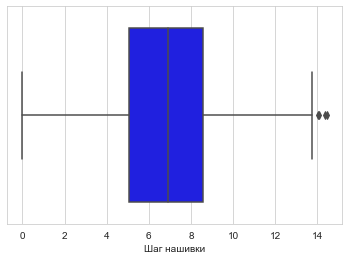

Минимальное значение:  0.0
Максимальное значение:  14.4405218753969
Среднее значение:  6.899222077675024
Медианное значение:  6.9161438559491



Плотность нашивки


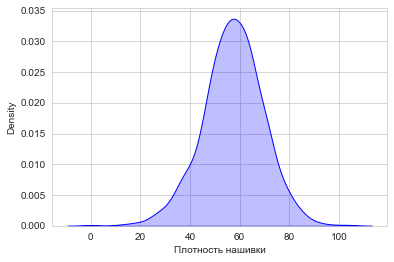

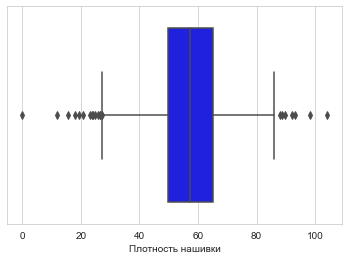

Минимальное значение:  0.0
Максимальное значение:  103.988901301494
Среднее значение:  57.15392943285763
Медианное значение:  57.3419198469929





In [17]:
# Наглядно отобразим диаграмму распределения каждого признака, рядом - "ящики с усами" с выбросами и описание минимального, максимального, среднего и медианного значений:  
for column_name in column_names:
    print(column_name)

    #Гистограммы распределения
    gis = ds[column_name]
    sns.set_style("whitegrid")
    sns.kdeplot(data = gis, shade = True, palette ='colorblind', color = "b")
    plt.show()
    
    #Диаграммы "Ящик с усами"
    sns.boxplot(x=gis, color = "b");
    plt.show()
    
    #минимальное, максимальное, среднее и медианное значения
    print("Минимальное значение: ", end = " ")
    print(np.min(gis))
    print("Максимальное значение: ", end=" ")
    print(np.max(gis))
    print("Среднее значение: ", end = " ")
    print(np.mean(gis))
    print("Медианное значение: ", end = " ")
    print(np.median(gis))
    print("\n\n")
# Видим, что распределение практически всех переменных, кроме "Угол нашивки" и "Поверхностная плотность, г/м2", выглядит близким к нормальному. Выбросы есть.

In [ ]:
# В соответствии с заданием, построим попарные графики рассеяния точек для всех признаков:
g = sns.PairGrid(ds[ds.columns])
g.map(sns.scatterplot, color = 'blue')
g.map_upper(sns.scatterplot, color = 'blue')
g.map_lower(sns.kdeplot, color = 'blue')
plt.show
# Зависимости между признаками не прослеживается.

In [ ]:
# С целью отображения наличия или отсутствия корреляции между признаками построим тепловую карту:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())
# Максимальная корреляция в 0.11 наблюдается между плотностью нашивки и углом нашивки, то есть зависимости между признаками нет. 

Удаление выбросов

In [ ]:
# Посмортим, сколько выбросов в каждом столбце:
ds.isna().sum()

In [ ]:
# Посчитаем выбросы методом межквартильных расстояний:
metod_iq = 0
count_iq = []
for column in ds:
    a = ds.loc[:, [column]]
    q1 = np.quantile(ds[column], 0.25)
    q3 = np.quantile(ds[column], 0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    a['iq'] = (ds[column] <= lower) | (ds[column] >= upper)
    metod_iq += a['iq'].sum()
    count_iq.append(a['iq'].sum())
    print(column, ': ', a['iq'].sum())
print('Метод межквартильных расстояний, выбросов:', metod_iq)

In [ ]:
# Создадим переменную с указнием характеристик с выбросами:
ds.columns
column_list_drop = ["Соотношение матрица-наполнитель",
                 "Плотность, кг/м3",
                 "модуль упругости, ГПа",
                 "Количество отвердителя, м.%",
                 "Содержание эпоксидных групп,%_2",
                 "Температура вспышки, С_2",
                 "Поверхностная плотность, г/м2",
                 "Модуль упругости при растяжении, ГПа",
                 "Прочность при растяжении, МПа",
                 "Потребление смолы, г/м2",
                 "Шаг нашивки",
                 "Плотность нашивки"]


In [ ]:
# Чтобы не искажать работу модели, удалим выбросы методом межквартильного расстояния:
for i in column_list_drop:
    q75, q25 = np.percentile(ds.loc[:,i], [75,25])
    intr_qr = q75 - q25
    max = q75 + (1.5 * intr_qr)
    min = q25 - (1.5 * intr_qr)
    ds.loc[ds[i] < min, i] = np.nan
    ds.loc[ds[i] > max, i] = np.nan

In [ ]:
# Проверим наличие выбросов после удаления:
ds.isnull().sum()

In [ ]:
# Удалим эти значения с выбросами:
ds = ds.dropna(axis=0)

In [ ]:
# Проверим наличие выбросов повторно:
ds.isnull().sum()

In [ ]:
# Загрузим информацию о датасете после работы с выбросами:
ds.reset_index(drop=True).info()

In [ ]:
#Повторно построим "ящики с усами" и проверим, не осталось ли выбросов:
scaler = MinMaxScaler()
scaler.fit(ds)
plt.figure(figsize = (50, 50))
plt.boxplot(pd.DataFrame(scaler.transform(ds)), labels = ds.columns,patch_artist = True, meanline = True, vert = False, boxprops = dict(facecolor = 'b', color = 'b'),medianprops = dict(color = 'blue'), whiskerprops = dict(color = "b"), capprops = dict(color = "black"), flierprops = dict(color = "b", markeredgecolor = "blue"))
plt.show()

In [ ]:
# Снова воспользуемся методом межквартильного расстояния для удаления оставшихся выбросов:
for i in column_list_drop:
    q75, q25 = np.percentile(ds.loc[:,i], [75,25])
    intr_qr = q75 - q25
    max = q75 + (1.5 * intr_qr)
    min = q25 - (1.5 * intr_qr)
    ds.loc[ds[i] < min, i] = np.nan
    ds.loc[ds[i] > max, i] = np.nan

In [ ]:
# Еще раз проверим наличие выбросов после второго удаления:
ds.isnull().sum()

In [ ]:
# Снова удалим эти значения с выбросами:
ds = ds.dropna(axis=0)

In [ ]:
#Просмотрим информацию о нашем датасете после еще одного удаления пропусков. Видим, что строк стало еще меньше
ds.reset_index(drop=True).info()

In [ ]:
#Еще раз построим "ящики с усами" и проверим, не осталось ли выбросов:
scaler = MinMaxScaler()
scaler.fit(ds)
plt.figure(figsize = (50, 50))
plt.boxplot(pd.DataFrame(scaler.transform(ds)), labels = ds.columns,patch_artist = True, meanline = True, vert = False, boxprops = dict(facecolor = 'b', color = 'b'),medianprops = dict(color = 'blue'), whiskerprops = dict(color = "b"), capprops = dict(color = "black"), flierprops = dict(color = "b", markeredgecolor = "blue"))
plt.show()

In [ ]:
#Снова воспользуемся методом межквартильного расстояния для удаления оставшихся выбросов:
for i in column_list_drop:
    q75, q25 = np.percentile(ds.loc[:,i], [75,25])
    intr_qr = q75 - q25
    max = q75 + (1.5 * intr_qr)
    min = q25 - (1.5 * intr_qr)
    ds.loc[ds[i] < min, i] = np.nan
    ds.loc[ds[i] > max, i] = np.nan

In [ ]:
# Снова удалим эти значения с выбросами:
ds = ds.dropna(axis=0)

In [ ]:
#Просмотрим информацию о нашем датасете после еще одного удаления пропусков. Видим, что строк стало еще меньше
ds.reset_index(drop=True).info()

In [ ]:
#Сохраняем подготовленный датасет без выбросов
ds.to_excel("D:\мгту им Баумана\ВКР_Новикова_Е.Г\Podgot\Podgot.xlsx")